In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge 
from sklearn import metrics
from sklearn.metrics import mean_squared_error


In [2]:
insurance_data = pd.read_csv('insurance.csv')

In [3]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance_data.shape

(1338, 7)

In [6]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


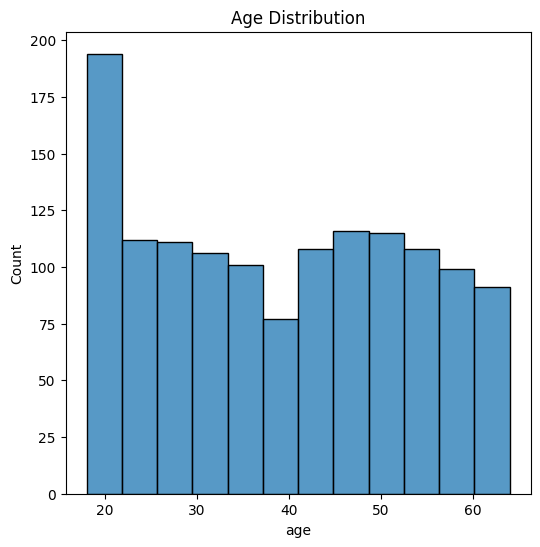

In [9]:
plt.figure(figsize=(6,6))
sns.histplot(insurance_data['age'])
plt.title('Age Distribution')
plt.show()

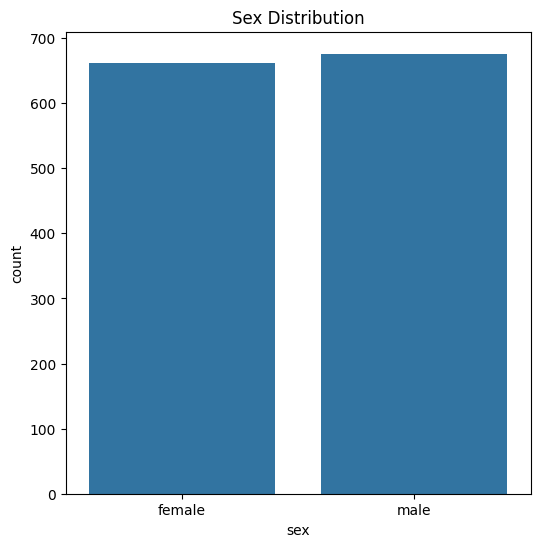

In [10]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_data)
plt.title('Sex Distribution')
plt.show()

<Figure size 600x600 with 0 Axes>

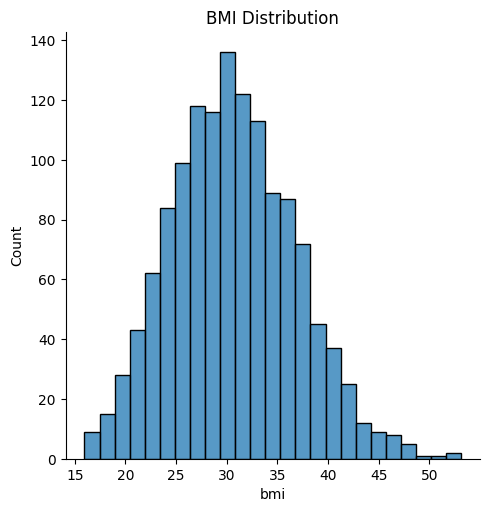

In [11]:
plt.figure(figsize=(6,6))
sns.displot(insurance_data['bmi'])
plt.title('BMI Distribution')
plt.show()

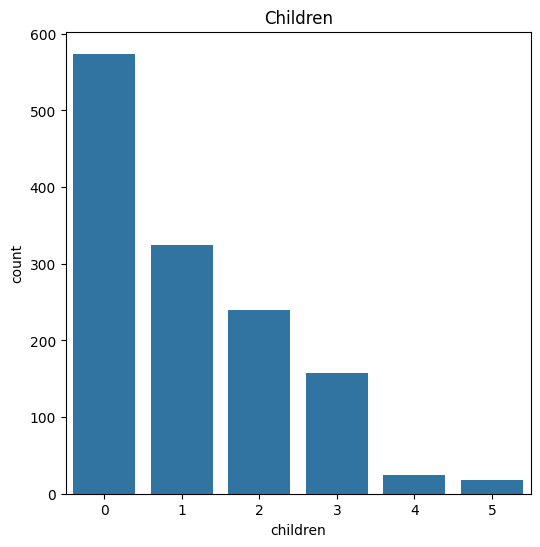

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_data)
plt.title('Children')
plt.show()

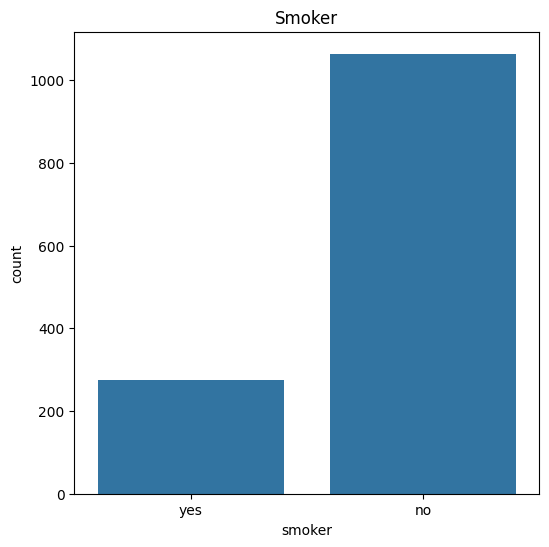

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_data)
plt.title('Smoker')
plt.show()

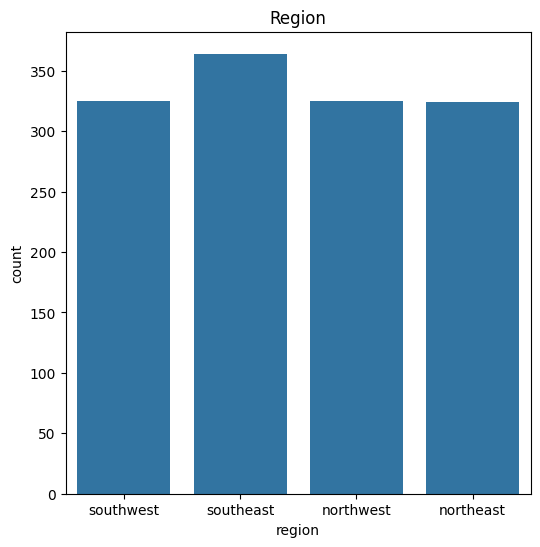

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_data)
plt.title('Region')
plt.show()

In [15]:
insurance_data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

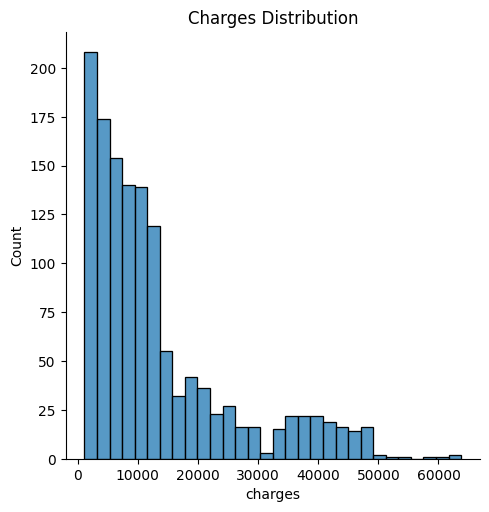

In [16]:
plt.figure(figsize=(6,6))
sns.displot(insurance_data['charges'])
plt.title('Charges Distribution')
plt.show()

<Axes: >

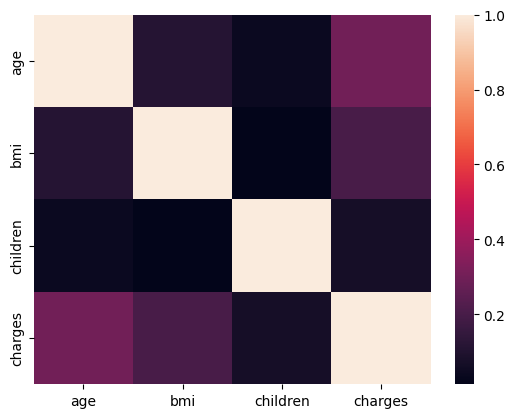

In [18]:
numeric = insurance_data.iloc[:,[0,2,3,6]]
sns.heatmap(numeric.corr())

In [24]:
insurance_data.replace({'sex':{'male':0,'female':1}},inplace=True)

insurance_data.replace({'smoker':{'yes':0,'no':1}},inplace=True)

insurance_data.replace({'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_17880\1611576457.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_data.replace({'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace=True)


<Axes: >

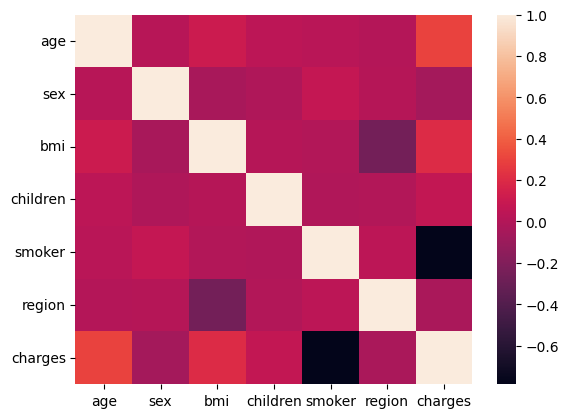

In [25]:
sns.heatmap(insurance_data.corr())

In [26]:
x = insurance_data.drop(columns='charges',axis=1)
y = insurance_data['charges']

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [28]:
def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    y_train_predict = model.predict(x_train)
    y_test_predict = model.predict (x_test)
    
    train_erroe = metrics.r2_score(y_train,y_train_predict)
    test_error = metrics.r2_score(y_test,y_test_predict)
    
    print('Training error (r2):',train_erroe)
    print('Testing error (r2):',test_error)
    
    plt.scatter(y_train,y_train_predict,marker='o',label='Train Prediction')
    plt.scatter(y_test,y_test_predict,marker='^',label='Test Prediction')
    
    plt.xlabel('True Values')
    plt.ylabel('Prediction')
    plt.title('True vs Prediction Values')
    plt.legend()
    plt.show()
    
    print('coefficients:')
    print(coefs)

In [29]:
reg = LinearRegression()

In [30]:
reg.fit(x_train,y_train)

LinearRegression()

Training error (r2): 0.7377774694894633
Testing error (r2): 0.795662115665063


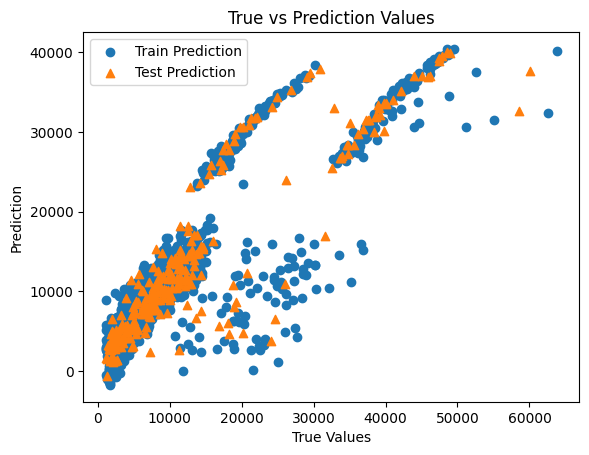

coefficients:
[10984.313032217267, 263.35219716398717, -11.854494788186855, 314.78179646491185, 468.00483887481533, -23524.275297639015, 343.4690684610478]


In [31]:
display_results(reg)

In [32]:
Lasso_reg_model = Lasso()

In [33]:
Lasso_reg_model.fit(x_train,y_train)

Lasso()

Training error (r2): 0.737777389675966
Testing error (r2): 0.7956444606741254


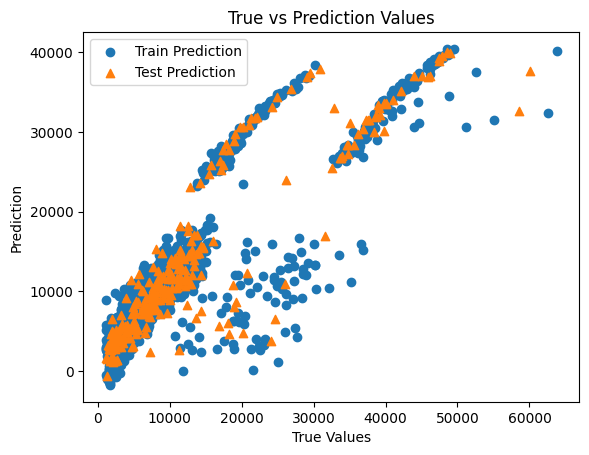

coefficients:
[10981.667956013882, 263.35302693572703, -8.229707668101295, 314.71571423299486, 467.3965623035896, -23518.118668540123, 342.4496297207818]


In [34]:
display_results(Lasso_reg_model)

In [35]:
rid_reg_model = Ridge()

In [36]:
rid_reg_model.fit(x_train,y_train)

Ridge()

Training error (r2): 0.737756304530985
Testing error (r2): 0.7951436764311538


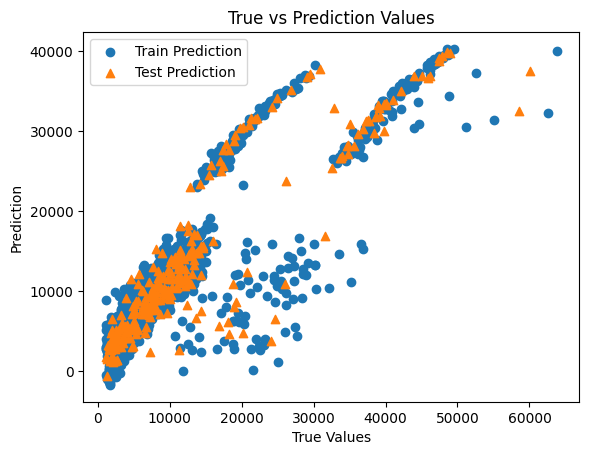

coefficients:
[10888.94177498632, 263.3411928607041, -18.835198128156367, 314.511493501201, 468.57510410022047, -23385.08956955837, 340.180423719441]


In [37]:
display_results(rid_reg_model)

In [44]:
input_data = (31,1,25.74,0,1,0)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = reg.predict(input_data_reshaped)
print(prediction)

print ('The insurance cost is USD',prediction[0])

[3714.58479288]
The insurance cost is USD 3714.5847928804997


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
